In [1]:
import numpy as np

### 单词级的one-hot编码

In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) +1
            
max_length = 10
results = np.zeros(shape=(len(samples),
                        max_length,
                        max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [22]:
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### 字符级的one-hot编码

In [3]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework']
characters = string.printable

token_index = dict(zip(characters, range(1, len(characters)+1)))
            
max_length = 50
results = np.zeros(shape=(len(samples),
                        max_length,
                        max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [23]:
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### 用keras实现单词级的one-hot编码

In [6]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework']
# 创建一个分词器，设置为只考虑前1000个最常见的单词
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples) # 构建单词索引
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index=tokenizer.word_index
print('Found %s unique tokes.' % len(word_index))

Found 9 unique tokes.


In [24]:
print(one_hot_results)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [25]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


### 使用散列技巧的单词级pmehot编码

In [21]:
samples = ['The cat sat on the mat.', 'The dog ate my homework']
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality)) 

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [26]:
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### 将一个Embedding层实例化

In [28]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

#### 加载imdb数据，准备用于Embedding层

In [30]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6595 - acc: 0.6396 - val_loss: 0.6007 - val_acc: 0.7060
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5264 - acc: 0.7558 - val_loss: 0.5194 - val_acc: 0.7344
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4543 - acc: 0.7886 - val_loss: 0.4995 - val_acc: 0.7480
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4186 - acc: 0.8076 - val_loss: 0.4956 - val_acc: 0.7526
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3935 - acc: 0.8235 - val_loss: 0.4950 - val_acc: 0.7532
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3728 - acc: 0.8346 - val_loss: 0.4977 - val_acc: 0.7534
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3541 - acc: 0.8459 - val_loss: 0.5044 - val_acc: 0.7516
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

## 处理IMDB数据的原始文本

In [43]:
import os
imdb_dir = './aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] =='.txt':
            f = open(os.path.join(dir_name, fname), 'r', encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
## 对数据进行文本分词

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [44]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [46]:
print(x_train)

[[  61    8    1 ...   37   11   28]
 [ 147  143   21 ...  155  424 7482]
 [ 395   80    3 ...  265 3231  342]
 ...
 [2864    4    1 ...    8    1   17]
 [  39  723    1 ...  848   11 2280]
 [   1 4681    4 ...   70  487   64]]


In [47]:
print(y_train)

[0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1]


In [48]:
print(x_val)

[[ 617  177    1 ...  385   37  131]
 [1617   22  212 ...  170   15   69]
 [ 255  116    7 ... 2449  783  110]
 ...
 [  13   29   41 ...   66    3  577]
 [  83  216   11 ...  253   31 2276]
 [  16  151  366 ...    4   65 4059]]


In [49]:
print(y_val)

[1 1 1 ... 0 0 1]


# GLOVE词嵌入

In [50]:
glove_dir = './glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), 'r', encoding='UTF-8')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


### 准备GloVe词嵌入矩阵

In [52]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
    if i<max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### 定义模型

In [53]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [55]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
Total params: 1,320,032
Trainable params: 1,320,032
Non-trainable params: 0
_________________________________________________________________


### 在模型中加载GloVe

In [56]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [59]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 148ms/step - loss: 7.5005 - acc: 0.3500 - val_loss: 7.5799 - val_acc: 0.2957
Epoch 2/10
7/7 [==============================] - 1s 113ms/step - loss: 7.4480 - acc: 0.2450 - val_loss: 7.5502 - val_acc: 0.2167
Epoch 3/10
7/7 [==============================] - 1s 109ms/step - loss: 7.4561 - acc: 0.2250 - val_loss: 7.6319 - val_acc: 0.2142
Epoch 4/10
7/7 [==============================] - 1s 122ms/step - loss: 7.4133 - acc: 0.2150 - val_loss: 7.6439 - val_acc: 0.2150
Epoch 5/10
7/7 [==============================] - 1s 124ms/step - loss: 7.4637 - acc: 0.2200 - val_loss: 7.6420 - val_acc: 0.2150
Epoch 6/10
7/7 [==============================] - 1s 121ms/step - loss: 7.4541 - acc: 0.2200 - val_loss: 7.5540 - val_acc: 0.2150
Epoch 7/10
7/7 [==============================] - 1s 123ms/step - loss: 7.3751 - acc: 0.2150 - val_loss: 7.5660 - val_acc: 0.2150
Epoch 8/10
7/7 [==============================] - 1s 125ms/step - loss: 7.4007 - acc: 0.21

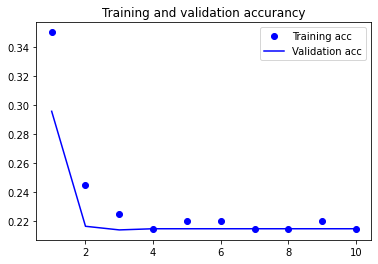

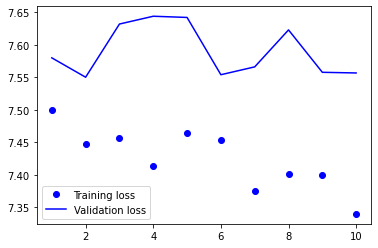

In [60]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accurancy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

### 在不使用预训练词嵌入的情况下，训练相同的模型

In [62]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 154ms/step - loss: 0.6937 - acc: 0.5250 - val_loss: 0.6919 - val_acc: 0.5274
Epoch 2/10
7/7 [==============================] - 1s 135ms/step - loss: 0.5116 - acc: 0.9700 - val_loss: 0.6908 - val_acc: 0.5260
Epoch 3/10
7/7 [==============================] - 1s 132ms/step - loss: 0.2838 - acc: 0.9900 - val_loss: 0.6937 - val_acc: 0.5284
Epoch 4/10
7/7 [==============================] - 1s 133ms/step - loss: 0.1306 - acc: 1.0000 - val_loss: 0.6974 - val_acc: 0.5281
Epoch 5/10
7/7 [==============================] - 1s 132ms/step - loss: 0.0602 - acc: 1.0000 - val_loss: 0.7013 - val_acc: 0.5337
Epoch 6/10
7/7 [==============================] - 1s 131ms/step - loss: 0.0310 - acc: 1.0000 - val_loss: 0.7115 - val_acc: 0.5289
Epoch 7/10
7/7 [==============================] - 1s 125ms/step - loss: 0.0170 - acc: 1.0000 - val_loss: 0.7202 - val_acc: 0.5271
Epoch 8/10
7/7 [==============================] - 1s 125ms/step - loss: 0.0097 - acc: 1.00

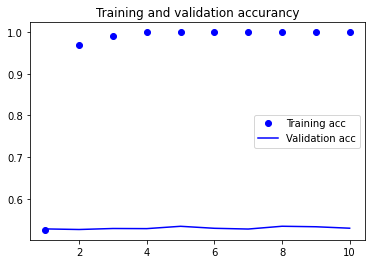

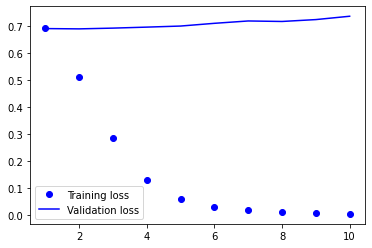

In [64]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accurancy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

### 对测试集数据进行分词

In [68]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] =='.txt':
            f = open(os.path.join(dir_name, fname), 'r', encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [71]:
model1.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

ValueError: You are trying to load a weight file containing 2 layers into a model with 3 layers.